In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [66]:
#Extract data
df_tr = pd.read_csv('Data\Intrusion-Detection\Train_data.csv',na_values='?',header=0)
df_tr.head(6)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos


In [67]:
df_ts = pd.read_csv('Data\Intrusion-Detection\Test_data.csv',na_values='?',header=0)
df_ts.head(6)

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,202,0,icmp,25,4,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,768,0,icmp,25,2,312,1856,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,3753,0,icmp,25,2,245,2058,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,20087,0,icmp,25,2,298,1267,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,16159,0,icmp,20,2,740,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal
5,18012,0,icmp,25,2,304,16414,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [68]:
#Drop ClassLabel column from input array X and Create output array y of Classlabel.
Xtr = np.array(df_tr.drop('xAttack',axis=1))
ytr = np.array(df_tr['xAttack'])
Xts = np.array(df_ts.drop('xAttack',axis=1))
yts = np.array(df_ts['xAttack'])

In [69]:
#Encode
le = preprocessing.LabelEncoder()
lb = preprocessing.LabelBinarizer()

In [70]:
Xtr[:,1] = le.fit_transform(Xtr[:,1])
Xts[:,2] = le.fit_transform(Xts[:,2])
Xts = np.delete(Xts,0,axis=1)


ytr = le.fit_transform(ytr)
lb.fit_transform(ytr)

yts = le.fit_transform(yts)
lb.fit_transform(yts)


array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [71]:
#Nomralize the data
Xtr_n = preprocessing.normalize(Xtr)
Xts_n = preprocessing.normalize(Xts)

In [77]:
from sklearn.decomposition import PCA
ncomp =41
# Construct the PCA object
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit the PCA components on the entire dataset
pca.fit(Xtr_n)
Ztr = pca.transform(Xtr_n)
Zts = pca.transform(Xts_n)

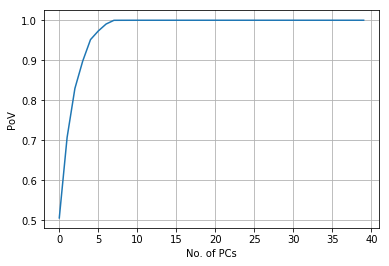

In [73]:
S = pca.singular_values_

lam = S**2
PoV = np.cumsum(lam)/np.sum(lam)

plt.plot(PoV)
plt.xlabel('No. of PCs')
plt.ylabel('PoV')
plt.grid()

In [87]:
ncomp =10
# Construct the PCA object
pca = PCA(n_components=ncomp, 
          svd_solver='randomized', whiten=True)

# Fit the PCA components on the entire dataset
pca.fit(Xtr_n)
Ztr = pca.transform(Xtr_n)
Zts = pca.transform(Xts_n)

In [107]:
K.clear_session()

In [108]:
nin = Ztr.shape[1]  # dimension of input data
nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden1'))
#model.add(Dense(units=50, activation='sigmoid', name='hidden2'))
model.add(Dense(units=nout, activation='softmax', name='output'))

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 100)               1100      
_________________________________________________________________
output (Dense)               (None, 5)                 505       
Total params: 1,605
Trainable params: 1,605
Non-trainable params: 0
_________________________________________________________________


In [110]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
hist = model.fit(Ztr, ytr, epochs=30, batch_size=100, validation_data=(Zts,yts))

Train on 125973 samples, validate on 10000 samples
Epoch 1/30
125973/125973 [==============================] - 1s 11us/step - loss: 0.3736 - acc: 0.8849 - val_loss: 1.3805 - val_acc: 0.6598
Epoch 2/30
125973/125973 [==============================] - 1s 9us/step - loss: 0.2078 - acc: 0.9378 - val_loss: 1.3294 - val_acc: 0.6996
Epoch 3/30
125973/125973 [==============================] - 1s 9us/step - loss: 0.1745 - acc: 0.9494 - val_loss: 1.3744 - val_acc: 0.7239
Epoch 4/30
125973/125973 [==============================] - 1s 9us/step - loss: 0.1536 - acc: 0.9547 - val_loss: 1.3912 - val_acc: 0.7291
Epoch 5/30
125973/125973 [==============================] - 1s 10us/step - loss: 0.1386 - acc: 0.9580 - val_loss: 1.5431 - val_acc: 0.7311
Epoch 6/30
125973/125973 [==============================] - 1s 10us/step - loss: 0.1263 - acc: 0.9601 - val_loss: 1.6239 - val_acc: 0.7287
Epoch 7/30
125973/125973 [==============================] - 1s 10us/step - loss: 0.1155 - acc: 0.9619 - val_loss: 1.71

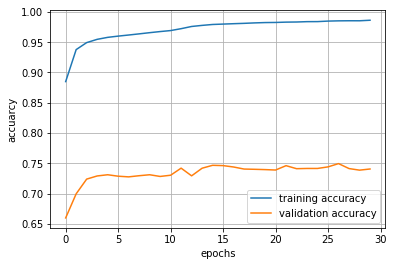

In [112]:
tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])

In [113]:
score, acc = model.evaluate(Zts, yts, verbose=1)
print("accuracy = %f" % acc)

10000/10000 [==============================] - 0s 14us/step
accuracy = 0.740600


In [115]:
maxTr = np.argmax(tr_accuracy)
maxTs = np.argmax(val_accuracy)
print('Max Training Accuracy obtained:',tr_accuracy[maxTr])
print('Max Test Accuracy obtained:',val_accuracy[maxTs])

Max Training Accuracy obtained: 0.986290723632133
Max Test Accuracy obtained: 0.7494999998807907
